In [1]:
import warnings
warnings.filterwarnings("ignore")
import MS
import scanpy as sc
import pysodb


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.9.3 pandas==1.5.1 scikit-learn==1.1.2 statsmodels==0.13.5 python-igraph==0.10.2 pynndescent==0.5.8


### load the dataset

In [18]:
sodb = pysodb.SODB()
adata_dict = sodb.load_dataset('Dataset1_MS_raw')
adata = list(adata_dict.values())[0]

load experiment[Dataset1] in dataset[Dataset1_MS_raw] from /home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/pysodb-1.0.0-py3.9.egg/es/pysodb/cache/Dataset1_MS_raw/Dataset1.h5ad


In [19]:
print('data size:',adata.shape)

data size: (1525, 79)


## cell type clustering

In [20]:
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=4000)
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.leiden(adata,resolution=2,key_added='ct')

## MS

In [21]:
# initialize the MS object
ms = MS.MS(
    adata
)

# set the number of scales, default is 15
ms.set_MS_para(
    n_scales=15
)

# construct the context-aware representation
ms.k_representation_mp()


In [22]:
# identify tissue structure given the number of k
k_expected = len(adata.obs['gt'].cat.categories)
ms.run_clustering_normal(
    k_expected 
    # the clustering parameter
    # positive value for the number of clusters
    # negative value for the clustering resolution
)

searching resolution to k=6
Res =  0.1 Num of clusters =  4
Res =  0.2 Num of clusters =  4
Res changed to 0.2
Res =  0.30000000000000004 Num of clusters =  5
Res changed to 0.30000000000000004
Res =  0.4 Num of clusters =  6
recommended res =  0.4


## output results

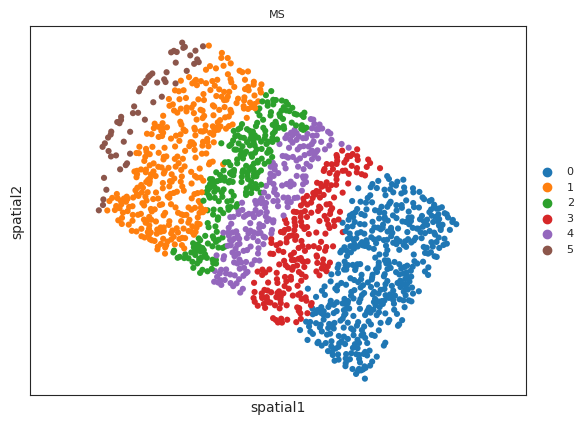

In [23]:
# the result of MS
ms.output_cluster('MS')

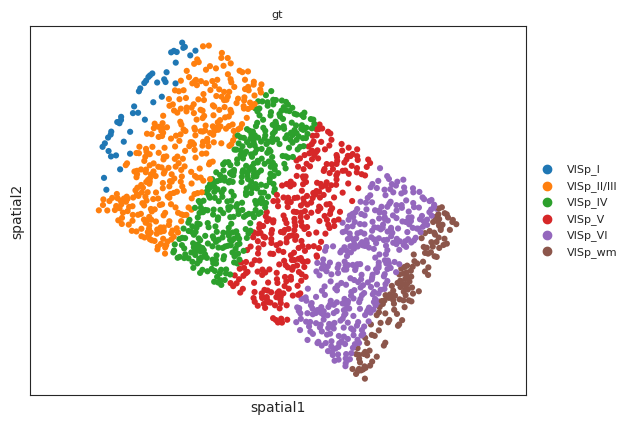

In [24]:
# ground truth
ms.output_cluster('gt')

## external application: Pseudo-space analysis

In [25]:
ms.run_pspace()

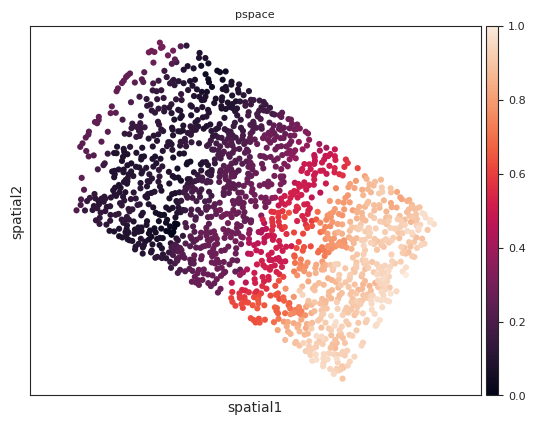

In [26]:
ms.output_pspace()

## external application: Tissue Visualization via MS-View

In [27]:
ms.run_visualization_normal()

generating color coding...
1.0 0.0


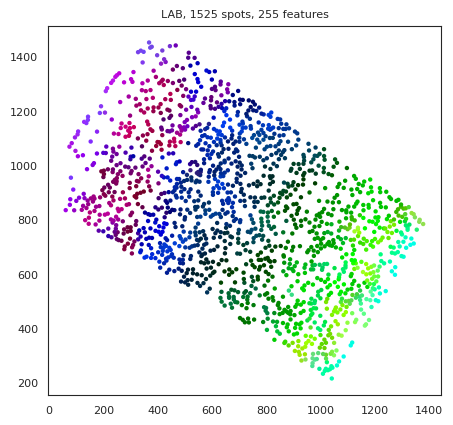

1.0 0.0


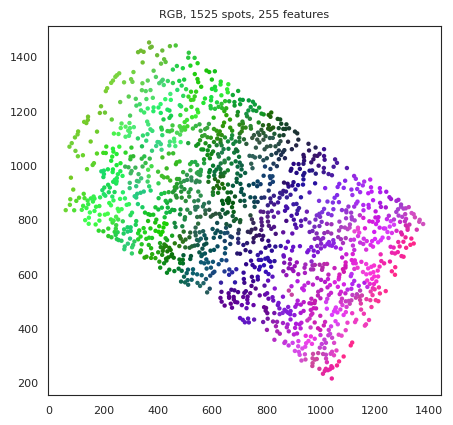

In [28]:
ms.output_visualization_single(
    dot_size=10
    # control the size of cell
)

In [18]:
# save results
ms.adata_MS.write_h5ad(f'process/{data_use}.h5ad')